# Viviendas adecuadas 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataVi = pd.read_csv('./BD_paradigmas.csv',encoding='latin1')
print(dataVi.shape)
dataVi.head()

(300, 30)


,NOM_ENT,DISTRITO,VPH_PISODT,VPH_2YMASD,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_CISTER,VPH_EXCSA,...,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN,VPH_NDEAED,VPH_SNBIEN,VPH_TELEF.1,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN
0,Aguascalientes,1,120028,90064,120635,120263,102010,97040,30588,119406,...,776,1146,1580,135,499,32683,14900,2752,8043,54801
1,Aguascalientes,2,131805,105591,132398,132168,130564,99298,46196,132262,...,244,474,218,22,207,51688,25751,1651,3813,40681
2,Aguascalientes,3,130801,103486,131328,130999,122618,99565,75737,130929,...,190,517,581,27,170,63447,29475,1618,3467,33514
3,Baja California,1,147416,106182,148451,148054,135151,3089,1002,139684,...,1005,1398,8129,243,581,70615,29949,4220,5526,44317
4,Baja California,2,126075,94569,127397,127510,126992,829,609,127082,...,545,421,614,110,412,82630,26747,2815,4302,26120


In [3]:
dataVi.columns

Index(['NOM_ENT ', 'DISTRITO', 'VPH_PISODT', 'VPH_2YMASD', 'VPH_C_ELEC',
       'VPH_AGUADV', 'VPH_AEASP', 'VPH_TINACO', 'VPH_CISTER', 'VPH_EXCSA',
       'VPH_C_SERV', 'VPH_DSADMA', 'VPH_REFRI', 'VPH_LAVAD', 'VPH_HMICRO',
       'VPH_TV', 'VPH_PC', 'VPH_TELEF', 'VPH_CEL', 'VPH_INTER', 'VPH_S_ELEC',
       'VPH_AGUAFV', 'VPH_NODREN', 'VPH_NDEAED', 'VPH_SNBIEN', 'VPH_TELEF.1',
       'VPH_CVJ', 'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCIN'],
      dtype='object')

Como identificador unico tomamos el nombre del estado y le agregamos el número de distrito 

In [4]:
dataVi['ID DISTRITO'] = dataVi['NOM_ENT '].map(str) + dataVi['DISTRITO'].astype(str)

In [5]:
first_column = dataVi.pop('ID DISTRITO')
dataVi.insert(0, 'ID DISTRITO', first_column)
dataVi=dataVi.drop(['DISTRITO'], axis=1)

In [6]:
dataVi['NOM_ENT '].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

Ahora nuestra BD tiene un ID DISTRITO y una columna con el nombre de estado para posteriormente sacar conclusiones agrupando los estados.

In [7]:
print(dataVi.shape)
dataVi.head()

(300, 30)


,ID DISTRITO,NOM_ENT,VPH_PISODT,VPH_2YMASD,VPH_C_ELEC,VPH_AGUADV,VPH_AEASP,VPH_TINACO,VPH_CISTER,VPH_EXCSA,...,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN,VPH_NDEAED,VPH_SNBIEN,VPH_TELEF.1,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN
0,Aguascalientes1,Aguascalientes,120028,90064,120635,120263,102010,97040,30588,119406,...,776,1146,1580,135,499,32683,14900,2752,8043,54801
1,Aguascalientes2,Aguascalientes,131805,105591,132398,132168,130564,99298,46196,132262,...,244,474,218,22,207,51688,25751,1651,3813,40681
2,Aguascalientes3,Aguascalientes,130801,103486,131328,130999,122618,99565,75737,130929,...,190,517,581,27,170,63447,29475,1618,3467,33514
3,Baja California1,Baja California,147416,106182,148451,148054,135151,3089,1002,139684,...,1005,1398,8129,243,581,70615,29949,4220,5526,44317
4,Baja California2,Baja California,126075,94569,127397,127510,126992,829,609,127082,...,545,421,614,110,412,82630,26747,2815,4302,26120


Empezamos modelacion de los datos 

In [8]:
# Estandarizamos los datos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(dataVi.iloc[:,2:].values)


In [9]:
# Reducción de dimensionalidad 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [10]:
# K Medias 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=123)
km = km.fit(X_pca)
y_hat = km.predict(X_pca)
C = km.cluster_centers_
etiquetas = km.labels_

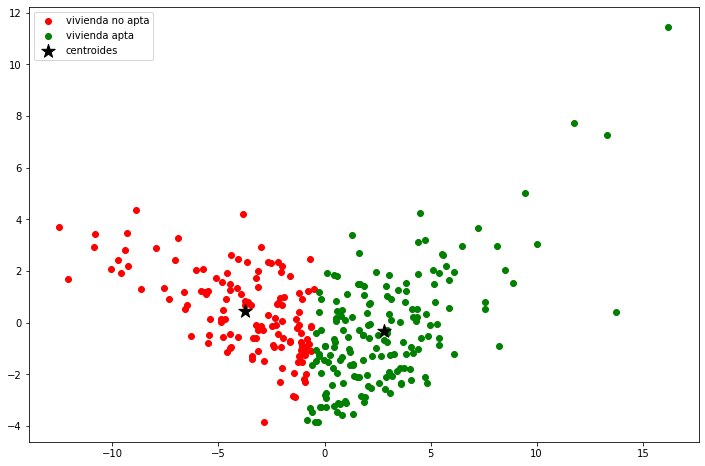

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[etiquetas==0,0],X_pca[etiquetas==0,1],color='red',label='vivienda no apta')
plt.scatter(X_pca[etiquetas==1,0],X_pca[etiquetas==1,1],c='g',label='vivienda apta')
plt.scatter(C[:,0],C[:,1], marker='*', s=200, c='k',label='centroides')
plt.legend(loc='best')
#plt.savefig('./imagenes/kmeans.png',dpi=300)
plt.show()

In [12]:
print('Vivienda no apta',dataVi[etiquetas==0].shape[0])
print('Vivienda apta',dataVi[etiquetas==1].shape[0])

Vivienda no apta 129
Vivienda apta 171


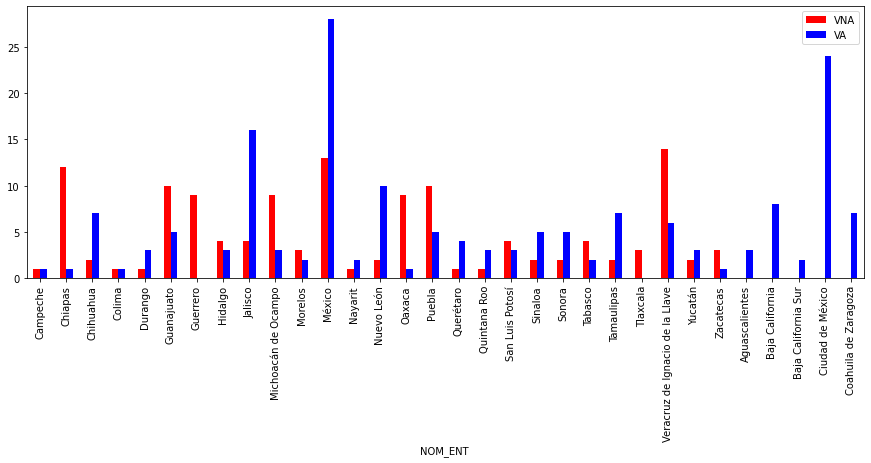

In [13]:
VNA = dataVi[etiquetas==0].groupby('NOM_ENT ')['ID DISTRITO'].nunique()
VA = dataVi[etiquetas==1].groupby('NOM_ENT ')['ID DISTRITO'].nunique()
DFV = pd.concat([VNA, VA], axis=1)
DFV.columns=['VNA', 'VA']
fig = DFV.plot(kind = 'bar',figsize=(15,5),color={'VNA': "red", 'VA': "blue"}).get_figure()
#fig.savefig('./imagenes/AyNA_PorEstado.png',dpi=300,bbox_inches='tight')



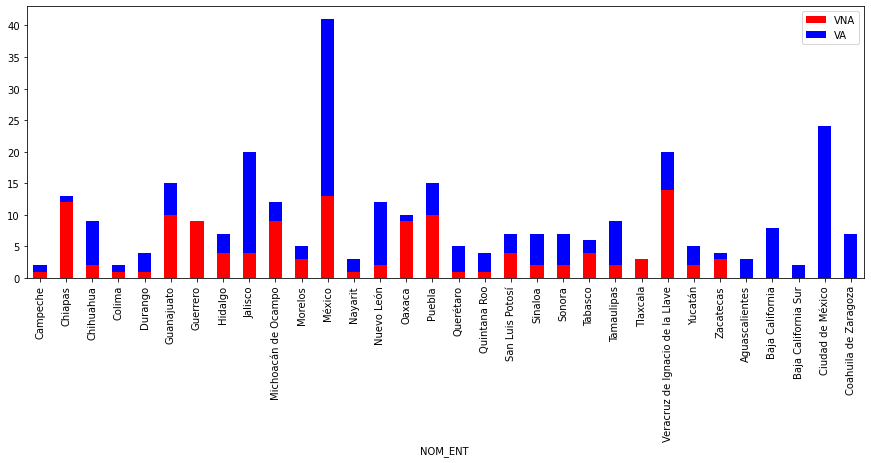

In [14]:
fig = DFV.plot(kind = 'bar',figsize=(15,5),color={'VNA': "red", 'VA': "blue"},stacked=True).get_figure()
#fig.savefig('./imagenes/AyNA_PorEstado2.png',dpi=300,bbox_inches='tight')

In [15]:
DFV.head(32)

,VNA,VA
NOM_ENT,,
Campeche,1.0,1.0
Chiapas,12.0,1.0
Chihuahua,2.0,7.0
Colima,1.0,1.0
Durango,1.0,3.0
Guanajuato,10.0,5.0
Guerrero,9.0,NaN
Hidalgo,4.0,3.0
Jalisco,4.0,16.0


In [16]:
# Con los datos ya clasificados aplicamos un modelo de Regresión Logistica 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,etiquetas,test_size=0.3)

In [17]:
print(len(X_train))
print(len(X_test))

210
90


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='auto', solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

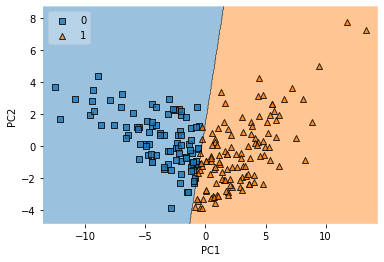

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=lr,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.savefig('./imagenes/LRTrain.png',dpi=300)
plt.show()

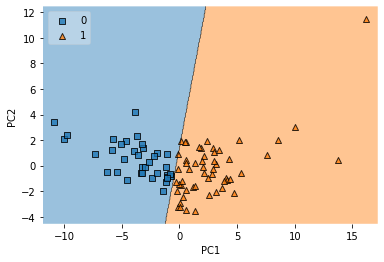

In [20]:
plot_decision_regions(X_test,y_test,clf=lr,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.savefig('./imagenes/LRTest.png',dpi=300)
plt.show()

In [21]:
lr.score(X_test, y_test)

0.9888888888888889

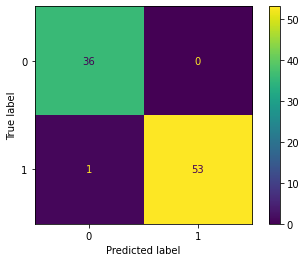

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)  
#plt.savefig('./imagenes/ConfusionMatrix.png',dpi=300)
plt.show()